# Conclusion Notebook

## Introduction:

Our project is finding the best neighborhood to do drugs in (**HIGHLY NOT RECOMMENDED WE DONT CONDONE DRUGS!!!!**)

Our approach to this project is to take each of our submetrics (Number of drug overdoses, number of arrests, and household income) and put them into new CSV files. We then take these new CSVs and plug them into a formula that outputs the "Drug Points" of a neighborhood.

We came up with the metric by looking through WPRDC and finding datasets that fit into our idea of drugs. We went through many different datasets, some of which we had to delete due to them not containing neighborhoods.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
# Reads the csv files we previously made

drugs = pd.read_csv("Possesions.csv", sep=",")
arrests = pd.read_csv("sortedArrestData.csv", sep=",")
money = pd.read_csv("money.csv", sep=",")

# Sorts the dataframes by Location to ensure they all match up

drugs = drugs.sort_values(by=['Location'],ascending=True)
arrests = arrests.sort_values(by=['Locations'],ascending=True)
money = money.sort_values(by=['Neighborhood'],ascending=True)

In [95]:

# Isolates the locations into lists

moneyLoc = money['Neighborhood'].tolist()
drugLoc = drugs['Location'].tolist()
arrestLoc = arrests['Locations'].tolist()      

# Turns each list into lowercase

moneyLoc = [str(x).lower() for x in moneyLoc]
drugLoc = [str(x).lower() for x in drugLoc]
arrestLoc = [str(x).lower() for x in arrestLoc]

# Sorts the dataframes

moneyLoc.sort()
drugLoc.sort()
arrestLoc.sort()

# Makes a list of all of the locations that are in all of the databases

locList = []
for each in moneyLoc:
    if each in moneyLoc and each in arrestLoc and each in drugLoc:
        locList.append(each)


In [96]:
# Creates three empty lists to use for holding values

moneyList = []
arrestsList = []
drugsList = []

# Checks if the location from the income data matches a location in the location list, then adds it to the previously made list

for x in range(len(money)):
    if locList.__contains__((money.iat[x,0]).lower()):
        moneyList.append(money.iat[x,1])

# Checks if the location from the arrests data matches a location in the location list, then adds it to the previously made list

for x in range(len(arrests)):
    if locList.__contains__((arrests.iat[x,0]).lower()):
        arrestsList.append(arrests.iat[x,1])

# Checks if the location from the police data matches a location in the location list, then adds it to the previously made list

for x in range(len(drugs)):
    if locList.__contains__((drugs.iat[x,0]).lower()):
        drugsList.append(drugs.iat[x,1])

# Zips all of the lists into 1 single dataframe

formulaDF = pd.DataFrame(list(zip(locList, moneyList, arrestsList, drugsList)), columns =['Location', 'Households which earned above $200K/month', 'Number of Arrests', 'Number of Drug Possesions'])

In [97]:
# Calculating Total Drug Points

pointsList = []

# Calculates the mean number of arrests to use for the formula

meanArrests = formulaDF[["Number of Arrests"]].mean().item()

# Iterates through the dataframe

for row in formulaDF.itertuples():

    income = getattr(row,'_2')
    arrests = getattr(row,'_3')
    possesions = getattr(row,'_4')

    # Calculates its Drug Points based off of the formula

    pointsList.append(100* round(((0.5 * income) + (4 * possesions)) / (1.5* arrests),3))


# Adds the drug points to the data frame

formulaDF["Drug Points"] = pointsList

# Sorts the dataframe by drug points

formulaDF = formulaDF.sort_values(by=['Drug Points'],ascending=False)


# The Best Neightborhood (to do hard drugs) is...

In [103]:
# Reveals the best neighborhood

formulaDF.head()

,Location,Households which earned above $200K/month,Number of Arrests,Number of Drug Possesions,Drug Points
18,central northside,64.0,23,49,660.9
76,st. clair,0.0,45,35,207.4
74,squirrel hill north,935.0,252,32,157.5
64,regent square,53.0,32,8,121.9
61,point breeze,482.0,283,41,95.4


# And The Worst Neighborhood (to do hard drugs) is...

In [99]:
# Reveals the worst neighborhood

formulaDF.tail()

,Location,Households which earned above $200K/month,Number of Arrests,Number of Drug Possesions,Drug Points
22,crafton heights,7.0,513,49,25.9
58,overbrook,4.0,280,25,24.3
26,east carnegie,0.0,47,4,22.7
78,strip district,83.0,440,23,20.2
35,glen hazel,0.0,143,9,16.8


# Our Metric - Drug Points

Drug Points combines all of our submetrics into one number. 

## Our Datasets
- [Police Incident Blotter](https://data.wprdc.org/dataset/uniform-crime-reporting-data) - Worked on by Ethan
- [Pittsburgh Police Arrest Data](https://data.wprdc.org/dataset/arrest-data) - Worked on by Greyson
- [Household Income in the Past 12 Months](https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/b119be7e-1c70-4bbe-bf34-2056fef533ec) - Worked on by Greyson & Ethan

The arrests submetric is used to find how much the arrests in an area deviate from the mean number of arrests of our list. Additionally we divided by arrests because this is a negative metric that should count against the final score.

The household income is used because rich people can buy the most drugs. By going to the area with the most number of highest earning people, you are more likely to earn more yourself (or you just rob them).

The number of possesions is used because this shows us where the most drugs are. Ideally, you want a place with a lot of available drugs.

---

## The Scientific Formula:

We assigned a half weighting to the household incomes in the area as we felt as though it wasn't as important as our other metrics.

We assigned a quadruple weighting to the number of possesions of drugs in the area because it is a very important metric to our final calculation.

We assigned a 1.5x weighting to the arrests because it is slightly important.

We multiplied by 100 to make the data easier to look at

**100 x (0.5 x Number of households which make above 200K) + (4 x Number of drug possesion charges)) / (1.5 x Arrests within that neighborhood)**


# The Best Neighborhood

Based off of our data, we have determined that the best neighborhood in Pittsburgh is **Central Northside**

We can see from the data that this combines all of our favorite metrics to create the perfect neighborhood to do drugs in. It has an astronomically low number of arrests within it. It heavily deviates from the mean causing its drug points to skyrocket. While it doesn't have anywhere near the most number of households which make over 200K, the number is substantial enough for you to have a good chance to make some huge bank within the neighborhood. Additionally, its drug possesions are fairly high compared to the rest of our data set.

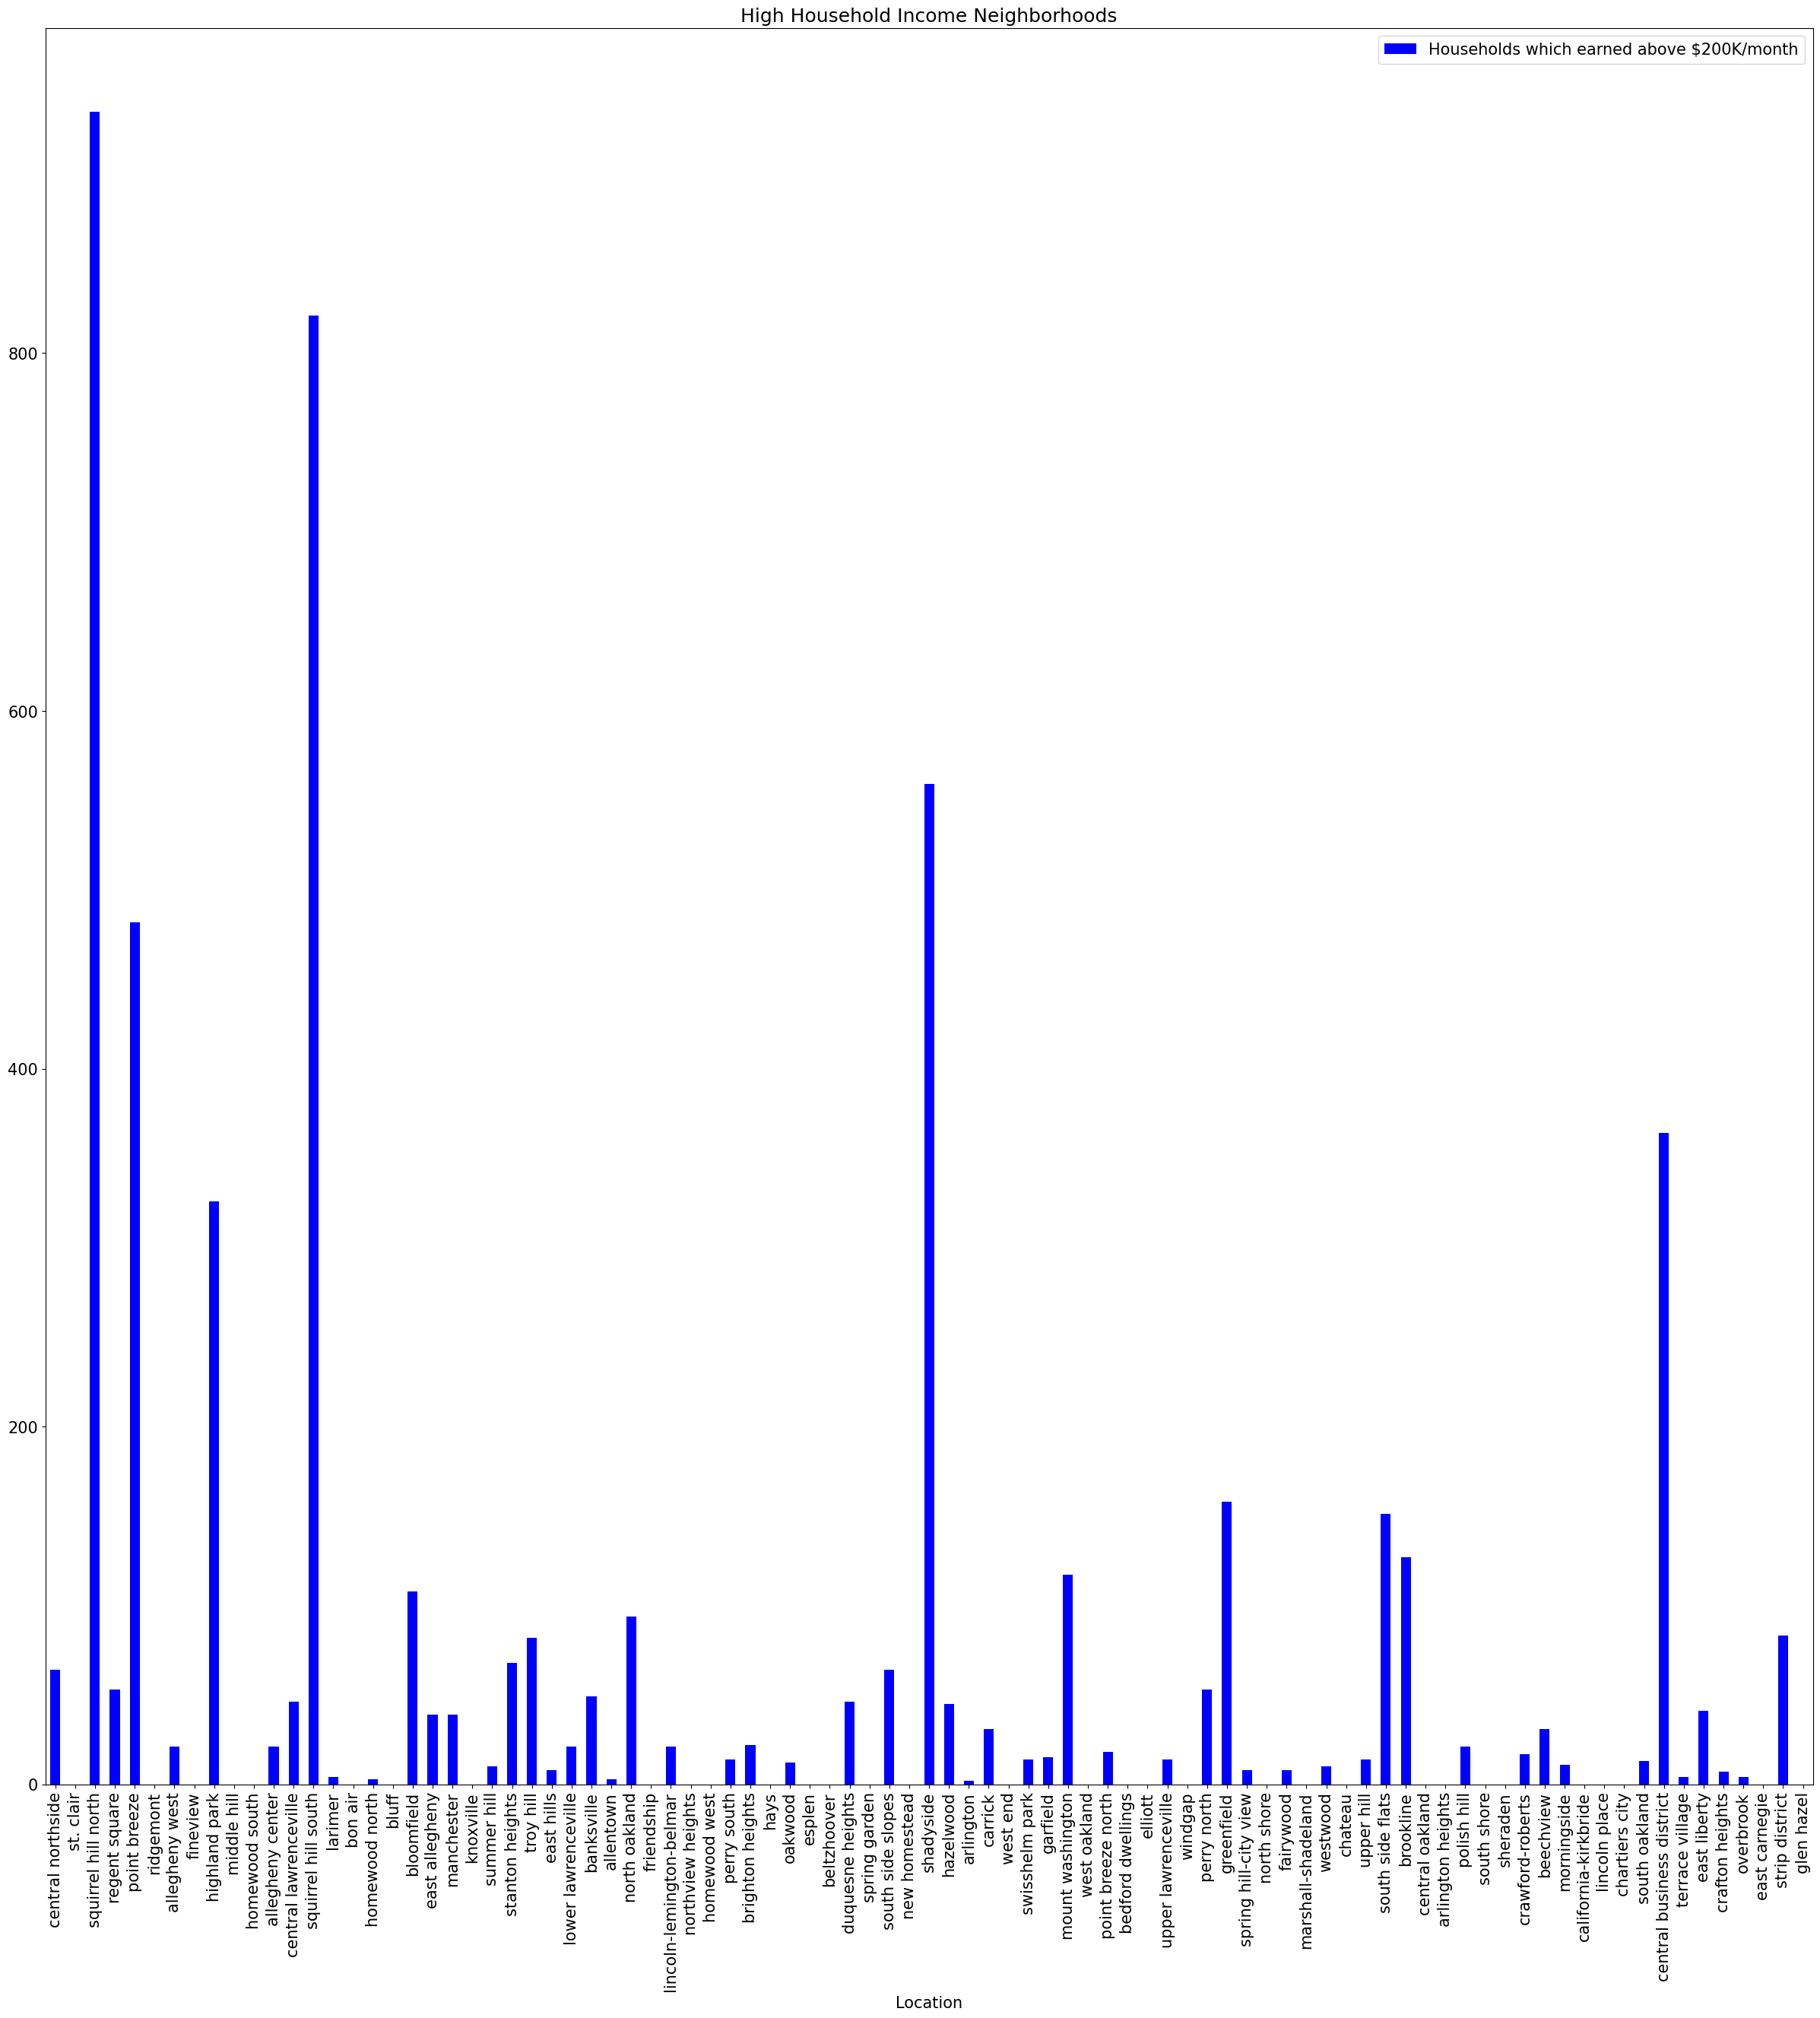

In [100]:
formulaDF.plot(kind = 'bar', x = 'Location', y = 'Households which earned above $200K/month', color = 'blue')
  
# set the title
plt.title('High Household Income Neighborhoods')

plt.rcParams['figure.figsize'] = [30, 30]
plt.rcParams['font.size'] = 15
# show the plot
plt.show()

<h1> Ok so what does this graph mean? </h1>

This graph displays the income data in a more digestible manner. The x-axis is the neighborhood and the y-axis is the number of households that make over 200K. As you can see from the graph, Squirrel Hill North beats out every other neighborhood for income. So why didn't it win the overall competition of where to do drugs?

When we were making our formula, we decided that just having money wasn't a very <i>important</i> thing that mattered when it came to finding a great place to do <b>hard drugs</b>. We also wanted to make sure that the neighborhood didn't have a high history of other arrests, and therefore police presence. So let's take a look at arrests next.

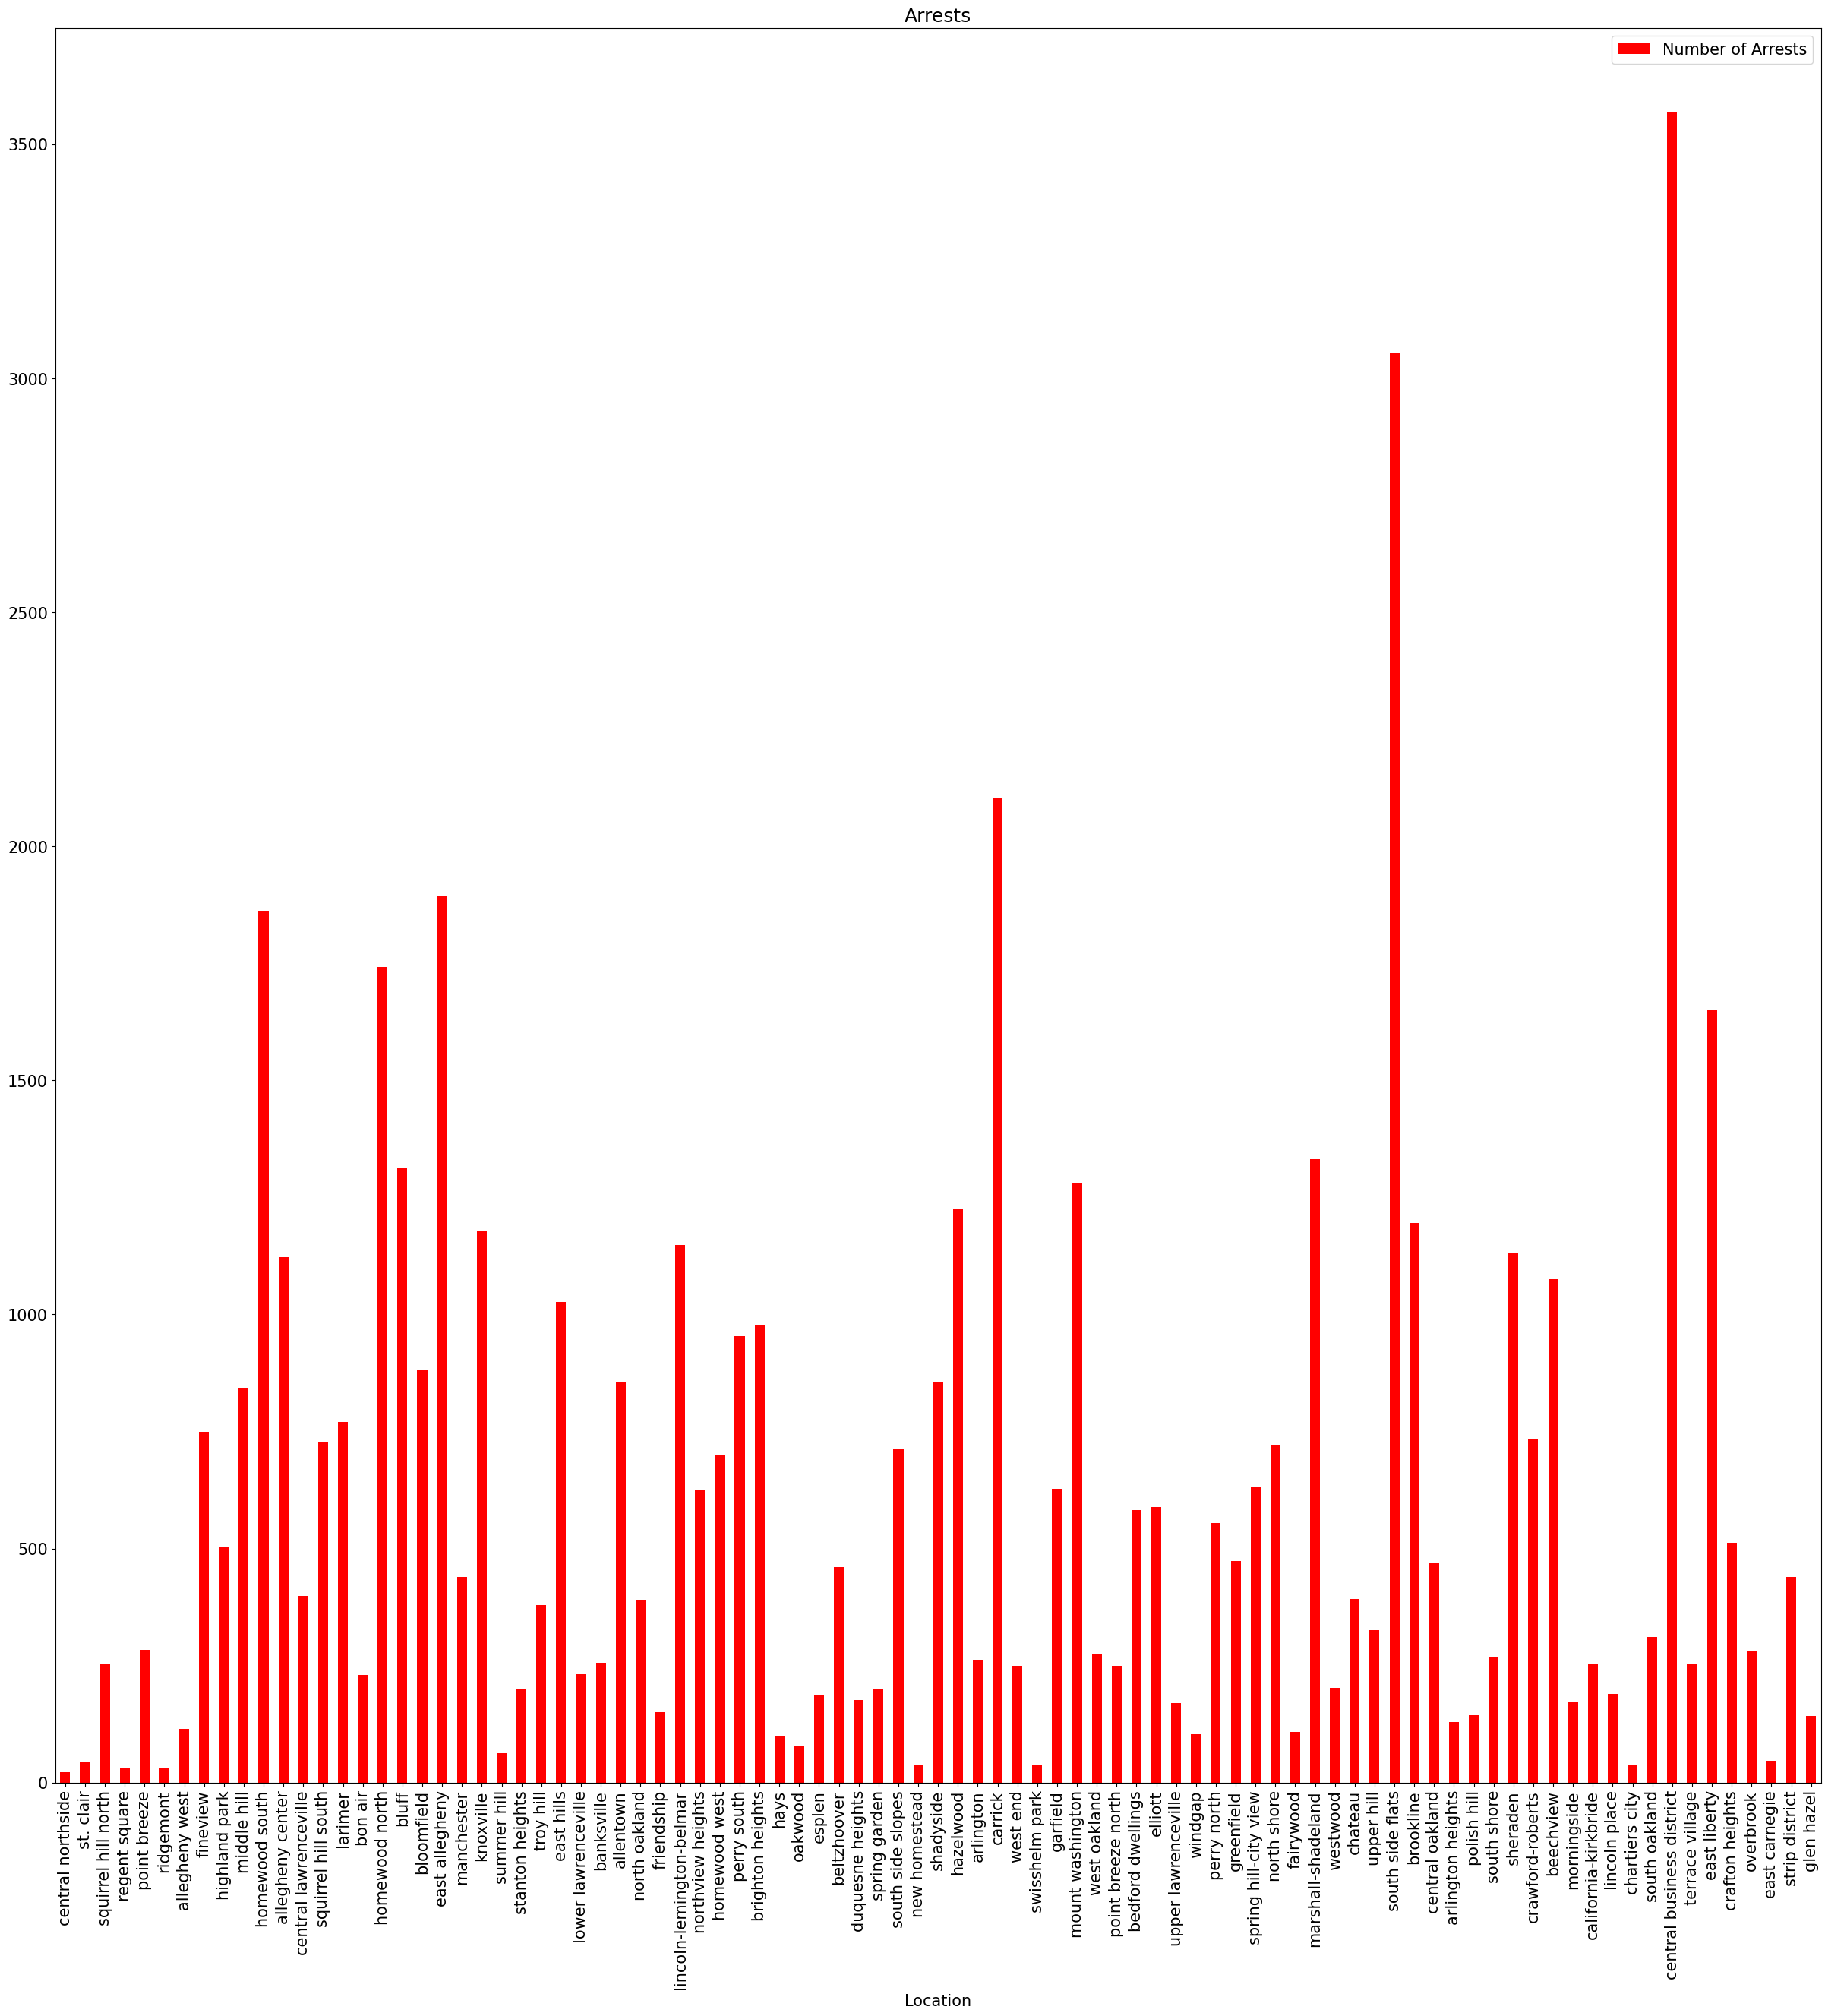

In [101]:
formulaDF.plot(kind = 'bar', x = 'Location', y = 'Number of Arrests', color = 'red')
  
# set the title
plt.title('Arrests')

plt.rcParams['figure.figsize'] = [30, 30]
plt.rcParams['font.size'] = 15
# show the plot
plt.show()

<h1> The Story Gets More Complicated </h1>

Ok, so Squirrel Hill North doesn't have a lot of arrests, but they definitely have more that some other places. We decided in our formulation that arrests would mean quite a bit to the overall score. The graph shows us that New Homestead, Hays, Oakwood, and East Carnegie,  all have a very low number of arrests. This is great for us because we want to do drugs in a place where we won't get caught. So why didn't these neighborhoods win? Let's take a look at the next graph.

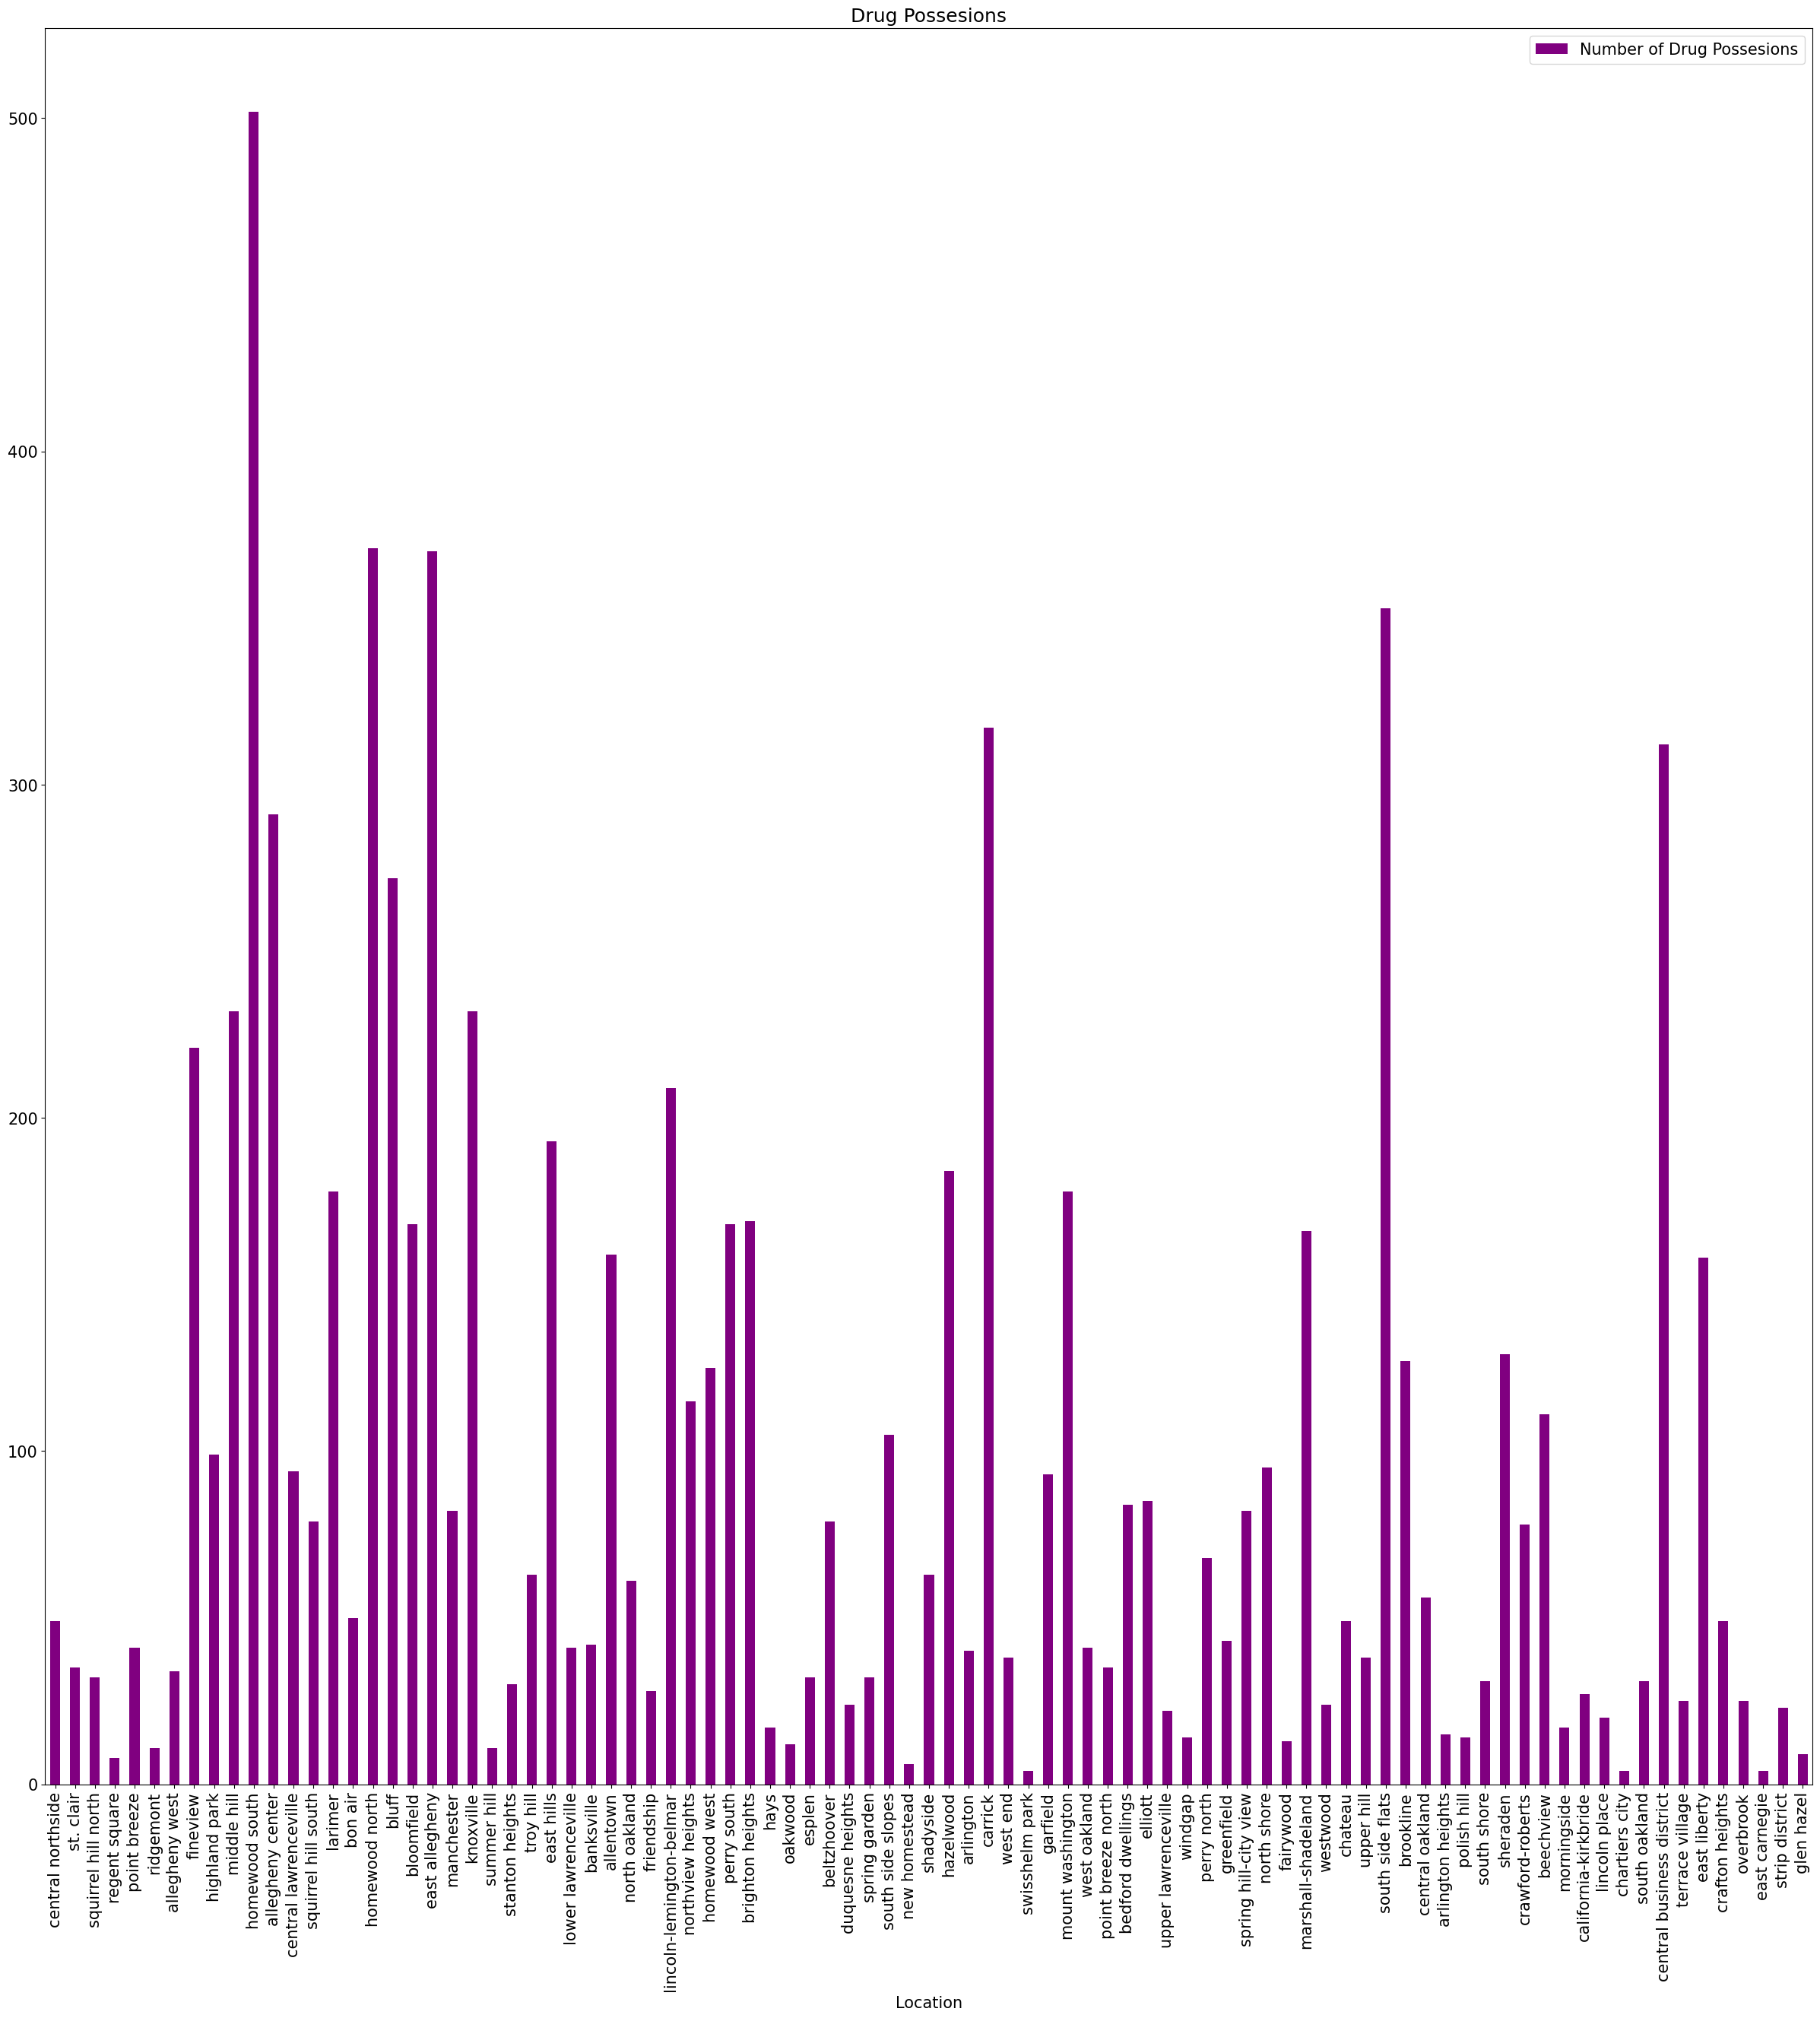

In [102]:
formulaDF.plot(kind = 'bar', x = 'Location', y = 'Number of Drug Possesions', color = 'purple')
  
# set the title
plt.title('Drug Possesions')

plt.rcParams['figure.figsize'] = [30, 30]
plt.rcParams['font.size'] = 15
# show the plot
plt.show()

<h1> The Final Graph </h1>

This graph shows us the number of drug possessions in each neighborhood. As you can see, Homewood South has the most drug possessions in the city. This is great for us because we want to do drugs in a place where there are a lot of drugs. So why didn't Homewood South win? When we were formulating the final scores, we decided that while the availability of drugs was an extremely important factor in finding the best neighborhood to do hard drugs, the number of arrests in Homewood south was far too high to hand it the overall victory. When you are doing hard drugs, you want to be able to do them without getting caught. If you are caught, then that's it, you lost and now you go off to prison.

<h1> Why You Should Trust Our Choice </h1>

From these three graphs that I just showed you, you can see that each of them has its respective winners. However, none of those places were chosen overall. This is because extremes are never good when it comes to drugs. We found that from our data, when a place was in an extreme in any of the categories, it never had enough potential in the other categories to justify an overall win. So when we were making our formula, we wanted it to reflect what we thought were the most important factors for finding the best place to do drugs. This is why we weighted everything differently. Income may be important to <i>buy</i> drugs, but it won't help you get them if they aren't in your neighborhood. It definitely won't help you if the police raid your house. Having a lot of drugs in your neighborhood was extremely important to us because when was the last time that you were able to just go out and buy meth? These things aren't super easy to find in certain neighborhoods, and it puts you at an extremely high risk if you go around asking too many people. While it was an important factor for us, getting caught was almost as important. If you get caught, you're done. No more drugs for a while and that is no fun for anyone. We wanted to make sure that our top neighborhood didn't have a very high presence of police. Not only does a high police presence make it hard to obtain drugs, but they always like to interrupt you while you are doing them, and that doesn't sound fun to us. So overall, we chose Central Northside as our overall winner. While it doesn't have a lot of money, it isn't last place. It has a very low number of arrests and an average number of drug possessions. Therefore, Central Northside is the perfect neighborhood for us to do drugs in. We hope that you enjoyed our project and that you learned something new about Pittsburgh.

# Conclusion 

### Greyson's:

> By measuring "bestness" in this way, it obviously doesn't come anywhere close to what my favorite neighborhiood is. My personal favorite is Greentree since that's where I grew up. While I might not be able to get away with doing black tar heroine in Greentree, it has the most personal connection to me. I can say with complete confidence that Dormont is my least favorite neighborhood, and I don't need any data to back that up.

### Ethan's

> This measure of the "greatest" neighborhood in Pittsburgh is rather strange when compared to what most people would answer with. I'm sure Central Northside is a fine place to live, but personally, I would rather live in Squirrell Hill North. They have a lot of money and I really enjoy money. Gen Hazel just sounds like a strange place to live, so I agree with our data that it is the worst. Overall, I think our data, while not particularly useful to me, is interesting in that you can use it to also find some of the safest neighborhoods, or  areas that don't have a whole lot of drugs overall. 